In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib_venn import venn2

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    cross_validate
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    accuracy_score,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

In [197]:
student_data = pd.read_csv('Student_Perf.csv')

In [198]:
student_data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,outcome
0,0,0.0,0.0,18,1.0,0.0,0.0,4.0,4.0,0.0,...,0.0,0.0,3.0,2.0,3.0,0.0,0.0,2.0,4.0,Low
1,1,0.0,0.0,17,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,4.0,2.0,2.0,0.0,0.0,2.0,2.0,Low
2,2,0.0,0.0,15,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,0.0,3.0,2.0,1.0,1.0,2.0,2.0,6.0,Low
3,3,0.0,0.0,15,1.0,0.0,1.0,4.0,2.0,1.0,...,1.0,1.0,2.0,1.0,1.0,0.0,0.0,4.0,0.0,High
4,4,0.0,0.0,16,1.0,0.0,1.0,3.0,3.0,1.0,...,0.0,0.0,3.0,2.0,1.0,0.0,1.0,4.0,0.0,High


In [199]:
# Display basic info and first few rows to explore the dataset
print("Dataset Info:\n")
print(student_data.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  649 non-null    int64  
 1   school      649 non-null    float64
 2   sex         649 non-null    float64
 3   age         649 non-null    int64  
 4   address     649 non-null    float64
 5   famsize     649 non-null    float64
 6   Pstatus     649 non-null    float64
 7   Medu        649 non-null    float64
 8   Fedu        649 non-null    float64
 9   reason      649 non-null    float64
 10  guardian    649 non-null    float64
 11  traveltime  649 non-null    float64
 12  studytime   649 non-null    float64
 13  failures    649 non-null    float64
 14  schoolsup   649 non-null    float64
 15  famsup      649 non-null    float64
 16  paid        649 non-null    float64
 17  activities  649 non-null    float64
 18  nursery     649 non-null    float64
 19  higher      64

In [200]:
# Check class distribution to assess imbalance
class_distribution = student_data['outcome'].value_counts(normalize=True)
print("\nClass Distribution:\n", class_distribution)


Class Distribution:
 outcome
Low     0.57473
High    0.42527
Name: proportion, dtype: float64


In [201]:
student_data['outcome']

0       Low
1       Low
2       Low
3      High
4      High
       ... 
644     Low
645    High
646     Low
647     Low
648     Low
Name: outcome, Length: 649, dtype: object

In [202]:
# Covert the target variable 'Diagnosis' to binary
student_data['outcome'] = student_data['outcome'].map({'High': 1, 'Low': 0})

In [203]:
# Check for NaNs in the 'Diagnosis' column
nans_in_outcome = student_data['outcome'].isna().sum()
print("Number of NaNs in 'outcome' column:", nans_in_outcome)

Number of NaNs in 'outcome' column: 0


In [204]:
# Define features (X) and target (y)
X = student_data.drop(columns=['Unnamed: 0', 'outcome'])  # Drop unnecessary columns
y = student_data['outcome']

In [205]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [206]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# Task 1

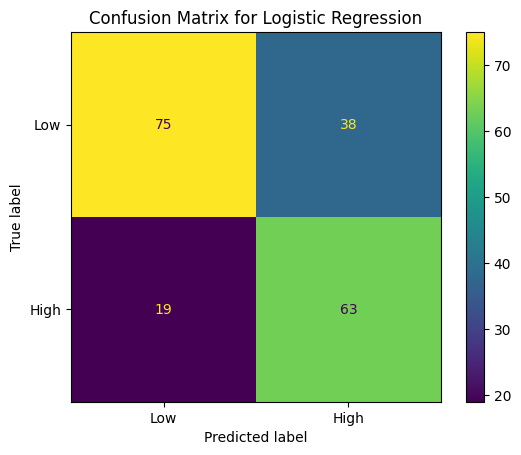

Classification Report for Decision Tree:

              precision    recall  f1-score   support

         Low       0.80      0.66      0.72       113
        High       0.62      0.77      0.69        82

    accuracy                           0.71       195
   macro avg       0.71      0.72      0.71       195
weighted avg       0.72      0.71      0.71       195



In [207]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

lr_predications = log_reg.predict(X_test_scaled)

ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, display_labels=['Low', 'High'])
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, lr_predications, target_names=['Low', 'High']))

This gives a general feel for the model, helps identify any unusual performance activity

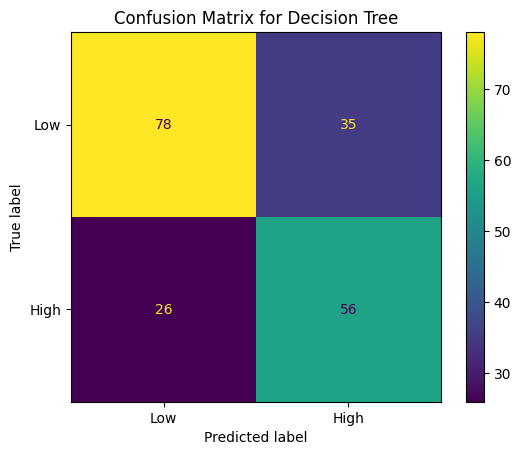

Classification Report for Decision Tree:

              precision    recall  f1-score   support

         Low       0.75      0.69      0.72       113
        High       0.62      0.68      0.65        82

    accuracy                           0.69       195
   macro avg       0.68      0.69      0.68       195
weighted avg       0.69      0.69      0.69       195



In [208]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)

ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, display_labels=['Low', 'High'])
plt.title("Confusion Matrix for Decision Tree")
plt.show()

print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, dt_predictions, target_names=['Low', 'High']))

This gives a general feel for the model, helps identify any unusual performance activity

## Cross-Validation
To ensure the robustness of our models, we perform stratified k-fold cross-validation. This helps in providing a more reliable estimate of the model's performance

In [209]:
# Define custom scoring for models - In this case only general accuracy is needed
scoring = {
    'accuracy': make_scorer(accuracy_score)  # Overall accuracy
}

The general accuracy metric was chosen to meet the requirments of assessing a baseline generalisation accruacy. 

In [210]:
def display_cv_scores(cv_results, num_folds=5):
    """
    Displays cross-validation accuracy scores with average values appended.

    Parameters:
    - cv_results (dict): Dictionary containing cross-validation results.
    - num_folds (int): Number of folds used in cross-validation.

    Returns:
    - None
    """
    # Create DataFrame with fold scores
    scores_df = pd.DataFrame({
        'Fold': range(1, num_folds + 1),
        'Accuracy': cv_results['test_accuracy']
    })

    # Calculate and append the average scores
    avg_scores = scores_df.mean().to_frame().T
    avg_scores['Fold'] = 'Average'
    scores_df = pd.concat([scores_df, avg_scores], ignore_index=True)

    # Display the scores without the index
    print("Cross-Validation Accuracy Scores:")
    print(scores_df.to_string(index=False))


### Cross Validation for each model

In [211]:
# Logistic Regression Classifier without regularization
log_reg_classifier = LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000, random_state=42)

# Define the pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),             
    ('classifier', log_reg_classifier)       
])

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and calculate accuracy
cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

# Display cross-validation results
display_cv_scores(cv_results, num_folds=5)

Cross-Validation Accuracy Scores:
   Fold  Accuracy
      1  0.723077
      2  0.769231
      3  0.630769
      4  0.784615
      5  0.705426
Average  0.722624


In [212]:
decision_tree = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(decision_tree, X, y, cv=cv, scoring=scoring)
display_cv_scores(cv_results, num_folds=5)

Cross-Validation Accuracy Scores:
   Fold  Accuracy
      1  0.669231
      2  0.576923
      3  0.653846
      4  0.630769
      5  0.596899
Average  0.625534


These average values are more robust and low variance than the training split values, and will be used for as a baseline performance for the classifiers

#### Hyperparameter Tuning - Decision Tree Model
We perform hyperparameter tuning using grid search to find the best parameters for the Decision Tree model. The performance metrics are recalculated and compared with the initial model. classifier__min_samples_split was the paramater chosen for optimisation

In [213]:
decision_tree = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline([
    ('classifier', decision_tree)
])

param_grid = {
    # 'classifier__max_depth': [5, 10, 15, 20, None]  # Search across a range of tree depths
    'classifier__min_samples_split': [2, 5, 10, 20]  # Search across a range of min samples split
}

# Perform grid search with accuracy as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X, y)

# Get the best estimator and parameters
dt_best_model = grid_search.best_estimator_
dt_best_params = grid_search.best_params_

# Print the best parameters found
print("Best parameter for optimising accuracy:")
print(dt_best_params)

# Perform cross-validation with the best model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(dt_best_model, X, y, cv=cv, scoring={'accuracy': 'accuracy'})

# Display cross-validation results
display_cv_scores(cv_results, num_folds=5)

Best parameter for optimising accuracy:
{'classifier__min_samples_split': 20}
Cross-Validation Accuracy Scores:
   Fold  Accuracy
      1  0.723077
      2  0.623077
      3  0.646154
      4  0.707692
      5  0.674419
Average  0.674884


The decision tree's accuracy improved by approx. 5% using this optimised parameter

### Hyperparameter Tuning - Logistic Regression
We perform hyperparameter tuning using grid search to find the best parameters for the a logistic regression with L1 regularisation. The performance metrics are recalculated and compared with the initial model.

In [214]:
logistic_regression = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),             # Scaling to standardize the features
    ('classifier', logistic_regression)       # Logistic Regression as classifier
])

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search to optimize the C parameter (inverse of regularization strength)
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]  # Range of values for regularization strength
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X, y)

# Get the best estimator and parameters
lr_best_model = grid_search.best_estimator_
lr_best_params = grid_search.best_params_

print("Best parameter for L1 regularization (C):")
print(lr_best_params)
cv_results = cross_validate(lr_best_model, X, y, cv=cv, scoring={'accuracy': 'accuracy'})
display_cv_scores(cv_results, num_folds=5)


Best parameter for L1 regularization (C):
{'classifier__C': 1}
Cross-Validation Accuracy Scores:
   Fold  Accuracy
      1  0.730769
      2  0.769231
      3  0.638462
      4  0.784615
      5  0.720930
Average  0.728801


There is no noteable increase in accuracy compared to the non-regularlised and optimised model, only a 0.6% numerical increase.

## Comparison of Model Performance Before and After Optimization

In this section, we compare the performance of the Decision Tree and Logistic Regression models before and after hyperparameter optimisation. The accuracy values for each model and condition are displayed in a bar chart to visualise the improvements achieved through tuning. This comparison helps in understanding the impact of hyperparameter tuning on model performance.

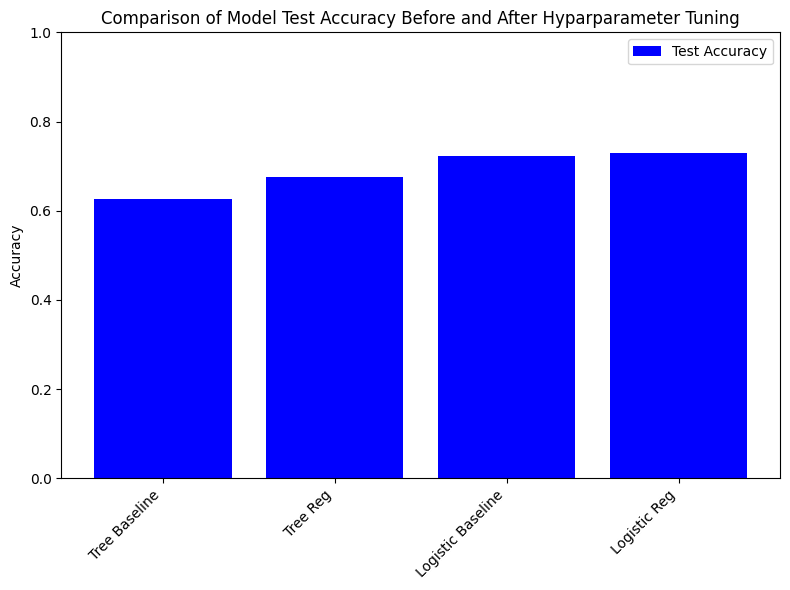

In [215]:
import matplotlib.pyplot as plt

# Accuracy values for each model and condition
models = ['Tree Baseline', 'Tree Reg', 'Logistic Baseline', 'Logistic Reg']
accuracy_values = [
    0.625534,  # Tree Baseline
    0.674884,   # Tree Reg
    0.722624,  # Logistic Baseline
    0.728801    # Logistic Reg
]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color='blue', label='Test Accuracy')
plt.xlabel('')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Test Accuracy Before and After Hyparparameter Tuning')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()



#### Key Observations:

**Baseline Models**:
   - The **Logistic Regression Baseline** model outperfroms the **Decision Tree Baseline** with roughly a 10% greater acucracy score
   
**Regularized and Optimised Models**:
   - The accuracy of the Decision Tree model certainly increased, by around 5%, while the regularized Logistic Regresison model barely increases in accuracy.
   
**Overall Model Comparison**:
   - The **Logistic Regression** model, both baseline and regularized, outperforms the Decision Tree model in test accuracy. This might indicate that Logistic Regression captures the data's linear relationships more effectively than the Decision Tree's hierarchical splits.

**Consistency**:
   - The accuracy improvement after Decision Tree regularization is strong but not for the logisitic regression, showing that hyperparameter tuning benefits both model types differently in this case


## Task 2: Feature Selection

In this task, we perform feature selection to identify the most important features for predicting student performance.

### Methodology


**Feature Selection Criteria**:
   - For the Decision Tree, feature importance values were extracted using the feature_importances_ attribute of the tree model.
   - For Logistic Regression, coefficients of the regularized model were analyzed, with non-zero coefficients indicating selected features.

**Stability Analysis**:
   - Features selected in **3 or more folds** were considered stable and included in the final feature set.
   - Features selected in fewer than 3 folds were marked as unstable and excluded to reduce noise and variability.

**Comparison Between Models**:
   - The stable features identified by the Decision Tree and Logistic Regression models were compared to assess agreement.
   - A Venn diagram was used to visualize the overlap between features selected by the two models.



By applying this methodology, we identified stable and meaningful features for predicting student performance while comparing the effectiveness and agreement of feature selection across the two models.



In [216]:
# Define stability threshold (3 folds)
stability_threshold = 3

# Track selected features across folds
dt_selected_features_per_fold = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    dt_best_model.fit(X_train, y_train)
    
    # Extract features with non-zero importance
    important_features = set(X_train.columns[dt_best_model.named_steps['classifier'].feature_importances_ > 0])
    dt_selected_features_per_fold.append(important_features)

# Convert list of selected features into a DataFrame for Decision Tree
dt_stability_df = pd.DataFrame(
    {f"Fold {i+1}": [1 if f in fold else 0 for f in X.columns] for i, fold in enumerate(dt_selected_features_per_fold)}
)
dt_stability_df.index = X.columns

# Count how often each feature is selected across folds
dt_feature_selection_counts = dt_stability_df.sum(axis=1)

# Separate stable and unstable features based on the threshold
stable_features = dt_feature_selection_counts[dt_feature_selection_counts >= stability_threshold].index
unstable_features = dt_feature_selection_counts[dt_feature_selection_counts < stability_threshold].index

# Update consistent features after applying the stability filter (stable features only)
dt_consistently_selected_features = set(stable_features)

print(f"Features consistently selected in at least {stability_threshold} folds (Decision Tree):")
print(list(dt_consistently_selected_features))
print(f"Features omitted (selected in fewer than {stability_threshold} folds):")
print(list(unstable_features))




Features consistently selected in at least 3 folds (Decision Tree):
['Fedu', 'guardian', 'address', 'Dalc', 'higher', 'goout', 'sex', 'absences', 'reason', 'Medu', 'freetime', 'traveltime', 'failures', 'nursery', 'famsize', 'health', 'school', 'Walc', 'famrel', 'schoolsup', 'studytime', 'age']
Features omitted (selected in fewer than 3 folds):
['Pstatus', 'famsup', 'paid', 'activities', 'internet', 'romantic']


# Decision Tree Feature Selection Stability

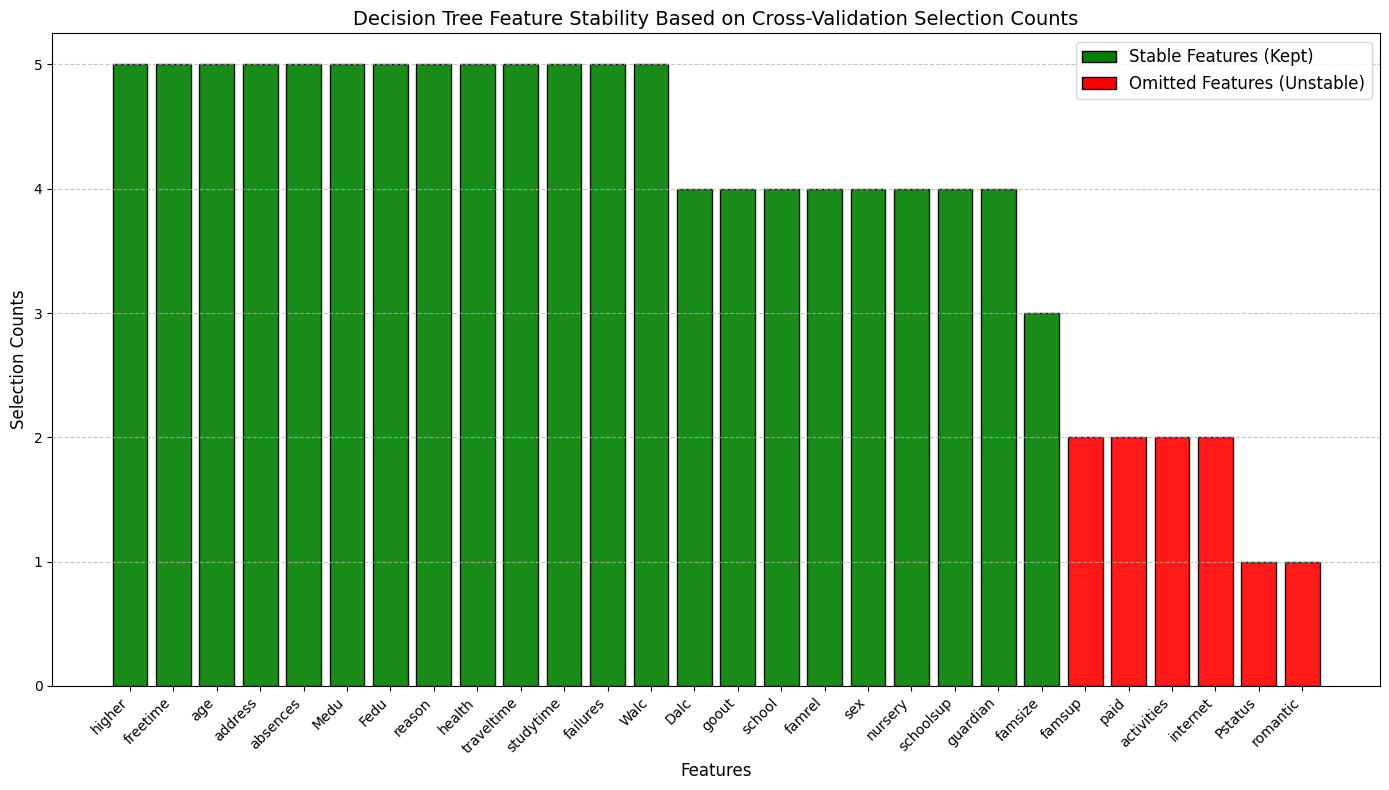

In [217]:

# Separate stable and unstable features based on the threshold
stable_features = dt_feature_selection_counts[dt_feature_selection_counts >= stability_threshold]
unstable_features = dt_feature_selection_counts[dt_feature_selection_counts < stability_threshold]

# Combine stable and unstable features for plotting
all_features = pd.concat([stable_features, unstable_features]).sort_values(ascending=False)

# Create a color list based on the stability of the features
colors = ['green' if feature in stable_features.index else 'red' for feature in all_features.index]

# Create the bar chart
plt.figure(figsize=(14, 8))

# Plot all features with their respective colors
plt.bar(all_features.index, all_features.values, color=colors, alpha=0.9, edgecolor='black')

# Add labels and formatting
plt.xlabel('Features', fontsize=12)
plt.ylabel('Selection Counts', fontsize=12)
plt.title('Decision Tree Feature Stability Based on Cross-Validation Selection Counts', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Stable Features (Kept)'),
    Patch(facecolor='red', edgecolor='black', label='Omitted Features (Unstable)'),
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()




The graph illustrates the stability of feature selection for the Decision Tree model across cross-validation runs. Features selected in 3 or more folds are categorized as stable (green bars), while those selected in fewer than 3 folds are marked as unstable (red bars).

Key Insights

- The Decision Tree model demonstrates high stability, with the majority of features consistently selected across folds.

- Stable features form the core set of predictive variables, indicating their strong and reliable contribution to the model.

- Unstable features, while omitted, may reflect noise or weaker associations with the target variable.

The feature selection process is robust, effectively identifying a consistent and reliable set of features. This highlights the model's ability to focus on meaningful predictors while minimizing the impact of less relevant variables.

In [218]:
# Define stability threshold (e.g., selected in at least 3 folds)
stability_threshold = 3

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Track selected features across folds
lr_selected_features_per_fold = []

for train_idx, test_idx in cv.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Fit the optimized model
    lr_best_model.fit(X_train, y_train)
    
    # Extract non-zero coefficients (selected features)
    non_zero_features = set(X_train.columns[lr_best_model.named_steps['classifier'].coef_[0] != 0])
    lr_selected_features_per_fold.append(non_zero_features)

# Convert list of selected features into a DataFrame for Logistic Regression
lr_stability_df = pd.DataFrame(
    {f"Fold {i+1}": [1 if f in fold else 0 for f in X.columns] for i, fold in enumerate(lr_selected_features_per_fold)}
)
lr_stability_df.index = X.columns

# Count how often each feature is selected across folds
lr_feature_selection_counts = lr_stability_df.sum(axis=1)

# Separate stable and unstable features based on the threshold
stable_features = lr_feature_selection_counts[lr_feature_selection_counts >= stability_threshold].index
unstable_features = lr_feature_selection_counts[lr_feature_selection_counts < stability_threshold].index

# Update consistent features after applying the stability filter (stable features only)
lr_consistently_selected_features = set(stable_features)

print(f"Features consistently selected in at least {stability_threshold} folds (Logistic Regression):")
print(list(lr_consistently_selected_features))

print(f"Features omitted (selected in fewer than {stability_threshold} folds):")
print(list(unstable_features))

Features consistently selected in at least 3 folds (Logistic Regression):
['romantic', 'Fedu', 'guardian', 'paid', 'address', 'Pstatus', 'Dalc', 'higher', 'internet', 'goout', 'sex', 'absences', 'reason', 'Medu', 'freetime', 'traveltime', 'famsup', 'failures', 'nursery', 'famsize', 'activities', 'health', 'school', 'Walc', 'famrel', 'schoolsup', 'studytime', 'age']
Features omitted (selected in fewer than 3 folds):
[]


# Logistic Regression Feature Selection Stability

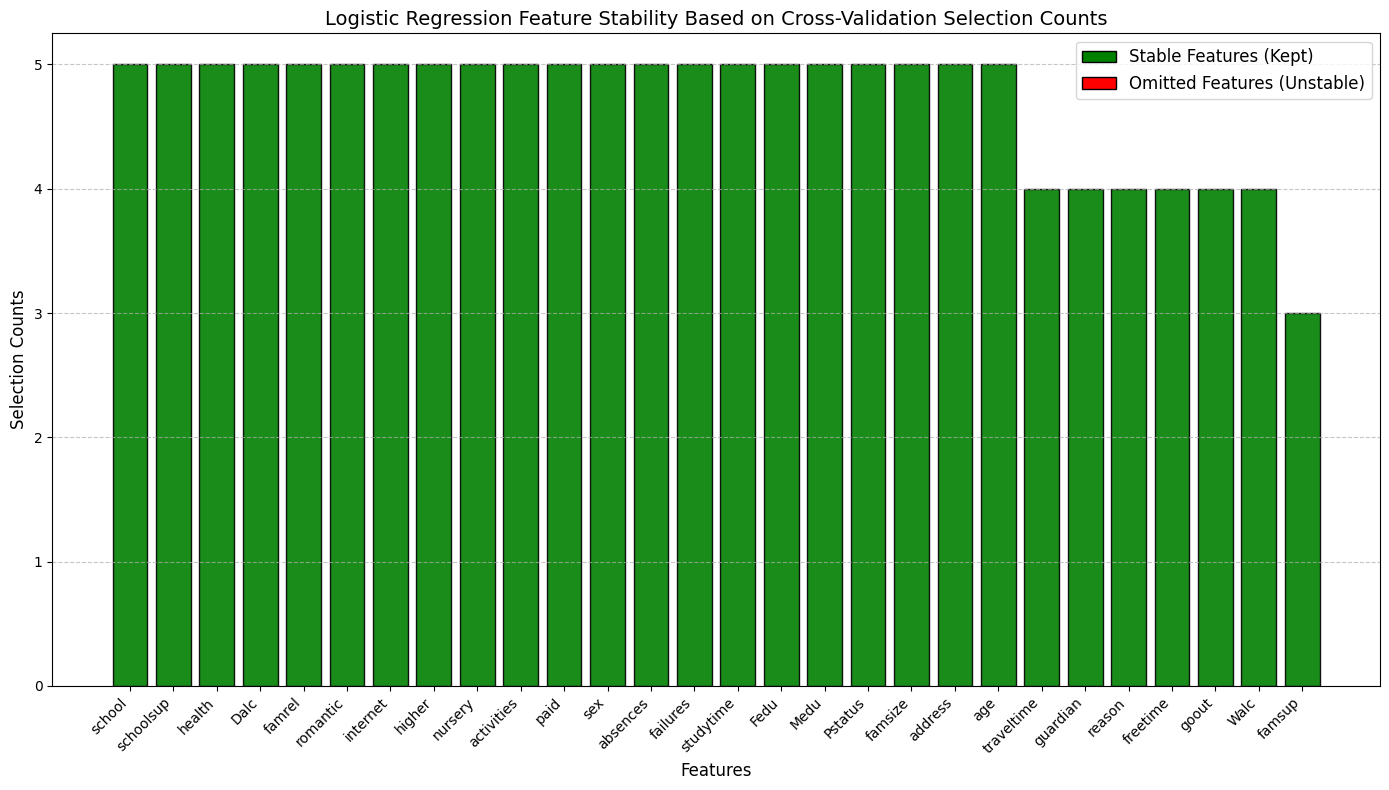

In [219]:
# Combine stable and unstable features for plotting
all_features_lr = pd.concat([lr_feature_selection_counts[stable_features], lr_feature_selection_counts[unstable_features]]).sort_values(ascending=False)

# Create a color list based on the stability of the features
colors = ['green' if feature in stable_features else 'red' for feature in all_features_lr.index]


plt.figure(figsize=(14, 8))
plt.bar(all_features_lr.index, all_features_lr.values, color=colors, alpha=0.9, edgecolor='black')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Selection Counts', fontsize=12)
plt.title('Logistic Regression Feature Stability Based on Cross-Validation Selection Counts', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Stable Features (Kept)'),
    Patch(facecolor='red', edgecolor='black', label='Omitted Features (Unstable)'),
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

The graph illustrates the stability of feature selection for the Logistic Regression model across cross-validation runs. Features selected in 3 or more folds are categorized as stable (green bars), while those selected in fewer than 3 folds are marked as unstable (red bars).

Key Insights

- The Logistic Regression model demonstrates exceptionally high stability, with almost all features consistently selected across folds.

- Stable features contribute significantly to the model's performance and form a robust predictive feature set.

- Unlike the Decision Tree, there are no significant unstable features identified, suggesting that the Logistic Regression model provides a more consistent feature selection process across cross-validation runs.

The feature selection process for Logistic Regression is highly stable and reliable, effectively identifying a consistent and meaningful set of predictors. This ensures that the model can generalize well and avoid overfitting to specific data splits.

# Feature Aggreement Across Models

Features Selected by Both Models (Common Features):
['Dalc', 'Fedu', 'Medu', 'Walc', 'absences', 'address', 'age', 'failures', 'famrel', 'famsize', 'freetime', 'goout', 'guardian', 'health', 'higher', 'nursery', 'reason', 'school', 'schoolsup', 'sex', 'studytime', 'traveltime']

Features Selected Only by Decision Tree:
[]

Features Selected Only by Logistic Regression:
['Pstatus', 'activities', 'famsup', 'internet', 'paid', 'romantic']


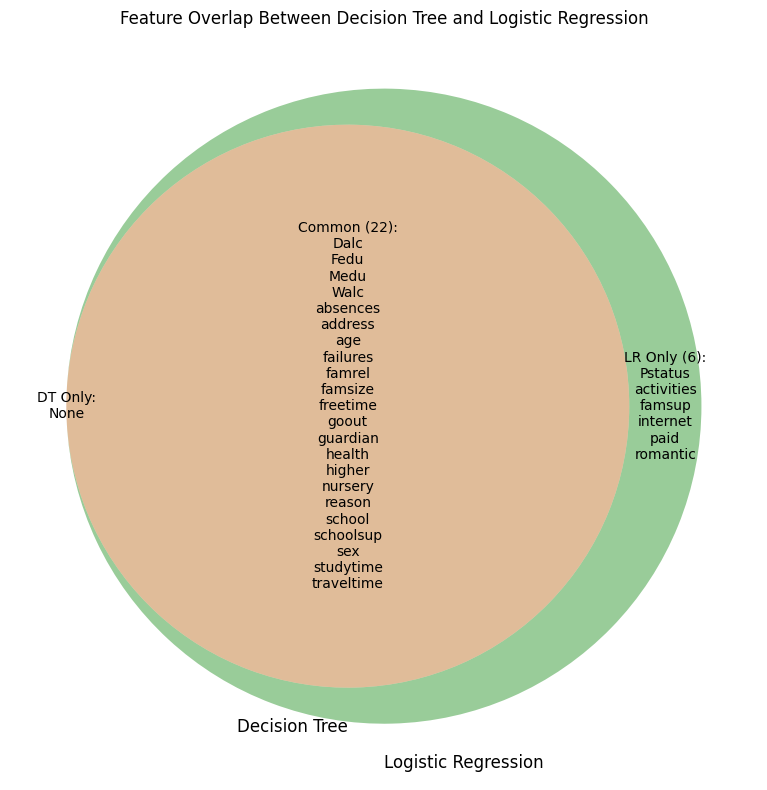

In [220]:
# Use stable features directly from the stability-based selection
dt_selected_features = dt_consistently_selected_features
lr_selected_features = lr_consistently_selected_features

# Find overlaps and differences
common_features = dt_selected_features.intersection(lr_selected_features)
dt_only_features = dt_selected_features - lr_selected_features
lr_only_features = lr_selected_features - dt_selected_features

print("Features Selected by Both Models (Common Features):")
print(sorted(list(common_features)))  # Sort for readability

print("\nFeatures Selected Only by Decision Tree:")
print(sorted(list(dt_only_features)))  # Sort for readability

print("\nFeatures Selected Only by Logistic Regression:")
print(sorted(list(lr_only_features)))  # Sort for readability

# Create the Venn diagram
plt.figure(figsize=(10, 8))
venn = venn2([dt_selected_features, lr_selected_features],
             set_labels=('Decision Tree', 'Logistic Regression'))

# Dynamically update labels based on content
if len(dt_only_features) > 0:
    venn.get_label_by_id('10').set_text(f"DT Only ({len(dt_only_features)}):\n" + "\n".join(sorted(list(dt_only_features))))
else:
    venn.get_label_by_id('10').set_text("DT Only:\nNone")

if len(lr_only_features) > 0:
    venn.get_label_by_id('01').set_text(f"LR Only ({len(lr_only_features)}):\n" + "\n".join(sorted(list(lr_only_features))))

if len(common_features) > 0:
    venn.get_label_by_id('11').set_text(f"Common ({len(common_features)}):\n" + "\n".join(sorted(list(common_features))))


plt.title("Feature Overlap Between Decision Tree and Logistic Regression")
plt.tight_layout()
plt.show()



Feature Overlap Between Decision Tree and Logistic Regression
The Venn diagram illustrates the overlap in feature selection between the Decision Tree and Logistic Regression models. Features are grouped into three categories:

- Common Features: Features selected by both models.

- Decision Tree Only: Features unique to the Decision Tree mode ( in this case none)

- Logistic Regression Only: Features unique to the Logistic Regression model.

**Key Insights**

Common Features:

- A substantial overlap is observed, with 22 features being selected by both models.

- This suggests strong agreement between the two models in identifying core predictive variables.

- These features likely represent the most critical predictors in the dataset, as they are consistently selected across models.

Decision Tree Only:

- No features are unique to the Decision Tree model, indicating that it agrees entirely with Logistic Regression for the features it selects.

- This reflects a robust alignment between the two models in the decision-making process.

Logistic Regression Only:

- 6 features are unique to Logistic Regression, including "Pstatus," "activities," "famsup," "internet," "paid," and "romantic."

- These features might capture subtle linear relationships that the Decision Tree does not prioritize due to its reliance on hierarchical splits rather than coefficients.


The strong overlap between the Decision Tree and Logistic Regression models highlights a high level of agreement in feature importance. The additional features selected by Logistic Regression might indicate its sensitivity to linear relationships, offering complementary insights to the Decision Tree's hierarchical approach. This reinforces the value of comparing models to ensure a comprehensive understanding of feature importance.